# 2-Dimensional Iteration: Image Processing

Two dimensional tables have both rows and columns. You have probably seen many tables like this if you have used a spreadsheet program. Another object that is organized in rows and columns is a digital image. In this section we will explore how iteration allows us to manipulate these images.

A digital image is a finite collection of small, discrete picture elements called pixels. These pixels are organized in a two-dimensional grid. Each pixel represents the smallest amount of picture information that is available. Sometimes these pixels appear as small “dots”.

Each image (grid of pixels) has its own width and its own height. The width is the number of columns and the height is the number of rows. We can name the pixels in the grid by using the column number and row number. However, it is very important to remember that computer scientists like to start counting with 0! This means that if there are 20 rows, they will be named 0,1,2, and so on through 19. This will be very useful later when we iterate using range.

In the figure below, the pixel of interest is found at column c and row r.

![](figures/image.png)

## The RGB Color Model

Each pixel of the image will represent a single color. The specific color depends on a formula that mixes various amounts of three basic colors: red, green, and blue. This technique for creating color is known as the RGB Color Model. The amount of each color, sometimes called the intensity of the color, allows us to have very fine control over the resulting color.

The minimum intensity value for a basic color is 0. For example if the red intensity is 0, then there is no red in the pixel. The maximum intensity is 255. This means that there are actually 256 different amounts of intensity for each basic color. Since there are three basic colors, that means that you can create 2563 distinct colors using the RGB Color Model.

Here are the red, green and blue intensities for some common colors. Note that “Black” is represented by a pixel having no basic color. On the other hand, “White” has maximum values for all three basic color components.

|Color|Red|Green|Blue|
|-----|---|-----|----|
|red|255|0|0|
|green|0|255|0|
|blue|0|0|255|
|white|255|255|255|
|black|0|0|0|
|yellow|255|255|0|
|magenta|255|0|255|

In order to manipulate an image, we need to be able to access individual pixels. This capability is provided by a module called image, provided in ActiveCode. ***See Image Processing on Your Own for ways to deal with images in standard Python***. The image module defines two classes: `Image` and `Pixel`.

Each Pixel object has three attributes: the red intensity, the green intensity, and the blue intensity. A pixel provides three methods that allow us to ask for the intensity values. They are called `getRed`, `getGreen`, and `getBlue`. In addition, we can ask a pixel to change an intensity value using its `setRed`, `setGreen`, and `setBlue` methods.

***FIXME: INSERT TABLE DESCRIBING METHODS***

In the example below, we first create a pixel with 45 units of red, 76 units of green, and 200 units of blue. We then print the current amount of red, change the amount of red, and finally, set the amount of blue to be the same as the current amount of green.

In [12]:
import comp110_image

p = comp110_image.Pixel((45, 76, 200))
print(p.getRed())
p.setRed(66)
print(p.getRed())
p.setBlue(p.getGreen())
print(p.getGreen(), p.getBlue())

45
66
76 76


## Image Objects

To access the pixels in a real image, we need to first create an Image object. Image objects can be created in two ways. First, an Image object can be made from the files that store digital images. The image object has an attribute corresponding to the width, the height, and the collection of pixels in the image.

It is also possible to create an Image object that is “empty”. An EmptyImage has a width and a height. However, the pixel collection consists of only “White” pixels.

We can ask an image object to return its size using the getWidth and getHeight methods. We can also get a pixel from a particular location in the image using getPixel and change the pixel at a particular location using setPixel.

The Image class is shown below. Note that the first two entries show how to create image objects. The parameters are different depending on whether you are using an image file or creating an empty image.

***FIXME: INSERT TABLE***

Consider the image shown below. Assume that the image is stored in a file called “luther.jpg”. Line 2 opens the file and uses the contents to create an image object that is referred to by img. Once we have an image object, we can use the methods described above to access information about the image or to get a specific pixel and check on its basic color intensities.

![](figures/luther.jpg)

In [ ]:
import comp110_image
img = comp110_image.Picture(filename="figures/luther.jpg")

print(img.getWidth())
print(img.getHeight())

p = img.getPixel(45, 55)
print(p.getRed(), p.getGreen(), p.getBlue())

When you run the program you can see that the image has a width of 400 pixels and a height of 244 pixels. Also, the pixel at column 45, row 55, has RGB values of 165, 161, and 158. Try a few other pixel locations by changing the getPixel arguments and rerunning the program.

### Image Processing and Nested Iteration

Image processing refers to the ability to manipulate the individual pixels in a digital image. In order to process all of the pixels, we need to be able to systematically visit all of the rows and columns in the image. The best way to do this is to use nested iteration.

Nested iteration simply means that we will place one iteration construct inside of another. We will call these two iterations the outer iteration and the inner iteration. To see how this works, consider the iteration below.

```python
for i in range(5):
    print(i)
```

We have seen this enough times to know that the value of i will be 0, then 1, then 2, and so on up to 4. The print will be performed once for each pass. However, the body of the loop can contain any statements including another iteration (another for statement). For example,

```python
for i in range(5):
    for j in range(3):
        print(i, j)
```

The for i iteration is the outer iteration and the for j iteration is the inner iteration. Each pass through the outer iteration will result in the complete processing of the inner iteration from beginning to end. This means that the output from this nested iteration will show that for each value of i, all values of j will occur.

Here is the same example in activecode. Try it. Note that the value of i stays the same while the value of j changes. The inner iteration, in effect, is moving faster than the outer iteration.

In [ ]:
for i in range(5):
    for j in range(3):
        print(i, j)

Another way to see this in more detail is to examine the behavior with codelens. Step through the iterations to see the flow of control as it occurs with the nested iteration. Again, for every value of i, all of the values of j will occur. You can see that the inner iteration completes before going on to the next pass of the outer iteration.

In [3]:
%%html
<iframe width="800" height="300" frameborder="0" src="https://pythontutor.com/iframe-embed.html#code=for%20i%20in%20range%285%29%3A%0A%20%20%20%20for%20j%20in%20range%283%29%3A%0A%20%20%20%20%20%20%20%20print%28i,%20j%29&codeDivHeight=400&codeDivWidth=350&cumulative=false&curInstr=0&heapPrimitives=nevernest&origin=opt-frontend.js&py=3&rawInputLstJSON=%5B%5D&textReferences=false"> </iframe>

Our goal with image processing is to visit each pixel. We will use an iteration to process each row. Within that iteration, we will use a nested iteration to process each column. The result is a nested iteration, similar to the one seen above, where the outer for loop processes the rows, from 0 up to but not including the height of the image. The inner for loop will process each column of a row, again from 0 up to but not including the width of the image.

The resulting code will look like the following. We are now free to do anything we wish to each pixel in the image.

```python
for row in range(img.getHeight()):
    for col in range(img.getWidth()):
        # do something with the pixel at position (col,row)
```

One of the easiest image processing algorithms will create what is known as a negative image. A negative image simply means that each pixel will be the opposite of what it was originally. But what does opposite mean?

In the RGB color model, we can consider the opposite of the red component as the difference between the original red and 255. For example, if the original red component was 50, then the opposite, or negative red value would be 255-50 or 205. In other words, pixels with a lot of red will have negatives with little red and pixels with little red will have negatives with a lot. We do the same for the blue and green as well.

The program below implements this algorithm using the previous image (luther.jpg). Run it to see the resulting negative image. Note that there is a lot of processing taking place and this may take a few seconds to complete. In addition, here are two other images that you can use (cy.png and goldygopher.png).

![cy.png](figures/cy.png)

![goldygopher.png](figures/goldygopher.png)

Change the name of the file in the image.Image() call to see how these images look as negatives. Also, note that there is an exitonclick method call at the very end which will close the window when you click on it. This will allow you to “clear the screen” before drawing the next negative.

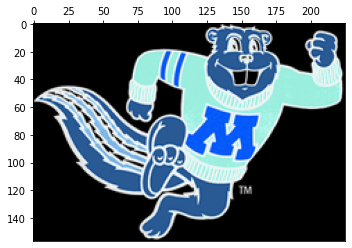

In [6]:
import comp110_image

img = comp110_image.Picture(filename="figures/goldygopher.png")

for row in range(img.getHeight()):
    for col in range(img.getWidth()):
        p = img.getPixel(col, row)

        newred = 255 - p.getRed()
        p.setRed(newred)
        newgreen = 255 - p.getGreen()
        p.setGreen(newgreen)
        newblue = 255 - p.getBlue()
        p.setBlue(newblue)

img.show()


Let’s take a closer look at the code. After importing the image module, we create an image object called img that represents a typical digital photo. we will update each pixel in this image from top to bottom, left to right, which you should be able to observe. You can change the values in setDelay to make the program progress faster or slower.

Lines 8 and 9 create the nested iteration that we discussed earlier. This allows us to process each pixel in the image. Line 10 gets an individual pixel.

Lines 12-14 create the negative intensity values by extracting the original intensity from the pixel and subtracting it from 255. Once we have the newred, newgreen, and newblue values, we can create a new pixel (Line 15).

Finally, we need to replace the old pixel with the new pixel in our image. It is important to put the new pixel into the same location as the original pixel that it came from in the digital photo.

Try to change the program above so that the outer loop iterates over the columns and the inner loop iterates over the rows. We still create a negative image, but you can see that the pixels update in a very different order.

### Other pixel manipulation

There are a number of different image processing algorithms that follow the same pattern as shown above. Namely, take the original pixel, extract the red, green, and blue intensities, and then create a new pixel from them. The new pixel is inserted into an empty image at the same location as the original.

For example, you can create a gray scale pixel by averaging the red, green and blue intensities and then using that value for all intensities.

From the gray scale you can create black white by setting a threshold and selecting to either insert a white pixel or a black pixel into the empty image.

You can also do some complex arithmetic and create interesting effects, such as [Sepia Tone](http://en.wikipedia.org/wiki/Sepia_tone#Sepia_toning).


## Conclusion

You have just passed a very important point in your study of Python programming. Even though there is much more that we will do, you have learned all of the basic building blocks that are necessary to solve many interesting problems. From an algorithm point of view, you can now implement selection and iteration. You can also solve problems by breaking them down into smaller parts, writing functions for those parts, and then calling the functions to complete the implementation. What remains is to focus on ways that we can better represent our problems in terms of the data that we manipulate. We will now turn our attention to studying the main data collections provided by Python.